In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('HD_Cleveland_Data_Clean.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [3]:
#no missing values!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slop        297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
target      297 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [5]:
df['target'].value_counts()

N    160
Y    137
Name: target, dtype: int64

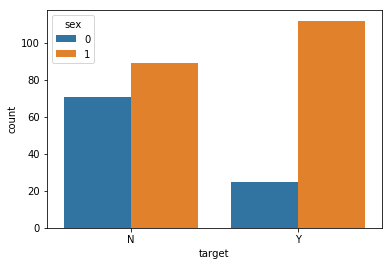

In [7]:
#how many male/female diagnosed with HD
sns.countplot(x = 'target', hue = 'sex', data = df)

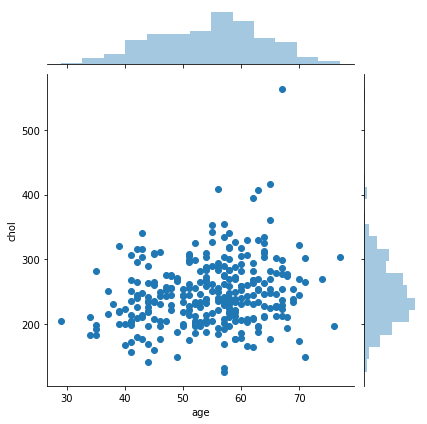

In [8]:
#how does age correlate with cholesterol
sns.jointplot(x='age', y = 'chol', data=df)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('target', axis = 1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DT = DecisionTreeClassifier()

In [20]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
pred = DT.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[32 17]
 [12 29]]
              precision    recall  f1-score   support

           N       0.73      0.65      0.69        49
           Y       0.63      0.71      0.67        41

   micro avg       0.68      0.68      0.68        90
   macro avg       0.68      0.68      0.68        90
weighted avg       0.68      0.68      0.68        90



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RFC = RandomForestClassifier(n_estimators=100)

In [25]:
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
RFCpred = RFC.predict(X_test)

In [30]:
print(confusion_matrix(y_test, RFCpred))
print(classification_report(y_test, RFCpred))

[[44  5]
 [ 8 33]]
              precision    recall  f1-score   support

           N       0.85      0.90      0.87        49
           Y       0.87      0.80      0.84        41

   micro avg       0.86      0.86      0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90



In [32]:
# Initializing an empty list to get the error rate for every k 
err_rate = []

# Let's run the for loop for n from 1 to 100, we can use range() method
for i in range(1,100):
    
    # Initializing RFC for n = i
    RFC = RandomForestClassifier(n_estimators=i)
    
    # fitting RFC 
    RFC.fit(X_train, y_train)
    
    # predicting for n = i
    RFCpred_i = RFC.predict(X_test)
    
    # error rate for n = i - appending to the list 'err_rate'
    # Avg of predictions and y_test if both not equal
    err_rate.append(np.mean(RFCpred_i != y_test))

Text(0, 0.5, 'Error_Rate')

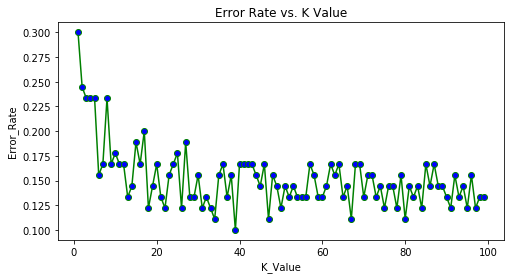

In [34]:
# look at the optimum number of n_estimators
plt.figure(figsize=(8,4))
plt.plot(range(1,100),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

In [37]:
RFC = RandomForestClassifier(n_estimators=38)
RFC.fit(X_train, y_train)
RFCpred2 = RFC.predict(X_test)

In [38]:
print(confusion_matrix(y_test, RFCpred2))
print(classification_report(y_test, RFCpred2))

[[46  3]
 [ 8 33]]
              precision    recall  f1-score   support

           N       0.85      0.94      0.89        49
           Y       0.92      0.80      0.86        41

   micro avg       0.88      0.88      0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90

